<a href="https://colab.research.google.com/github/jcastiblanco/-Fundamentos-de-IA-y-Machine-Learning/blob/main/Week3_ClasifficacionSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Ejercicio Support Vector Machine

In [ ]:
# definición de clases a utilizar
import pandas as pd
import numpy as np
#graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
#procesamiento
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#configuración matplolib
plt.rcParams['image.cmap']='bwr'
plt.rcParams['savefig.bbox']='tight'
style.use('ggplot') or plt.style.use('ggplot')

#configuracionh warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#cargar fichero
file='/content/data/ASI_casoPractico.csv'
data=pd.read_csv(file, sep=';')
data = data.drop(["ID","b","e","DR"], axis = 1)
#solo se cogen dos variables a modo de ejemplo Mean y Variance
vars=["ASTV","Mean"]
x=data[vars]
y=data.loc[:, data.columns=="Target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=0)

Text(0.5, 1.0, 'Estado de salud fetal')

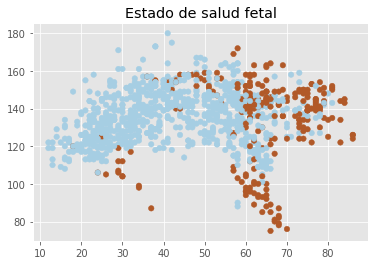

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(x_train.ASTV, x_train.Mean, c = y_train.Target, s=30, cmap=plt.cm.Paired)
ax.set_title("Estado de salud fetal")

In [ ]:
modelo = SVC(C=10, kernel= 'linear', random_state=123)
modelo.fit(x_train, y_train)

SVC(C=10, kernel='linear', random_state=123)

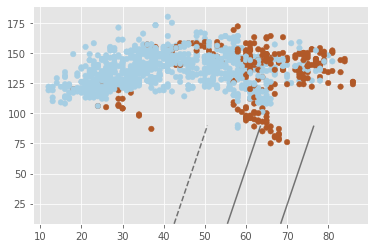

In [ ]:
plt.scatter(x_train.ASTV, x_train.Mean, c = y_train.Target, s=30, cmap=plt.cm.Paired)
#funcion de decision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#grid para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(xlim[0], xlim[1],30)
YY, XX = np.meshgrid( yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
Z = modelo.decision_function(xy).reshape(XX.shape)
#plano de ddecision
ax.contour(
    XX, YY, Z, colors="k", levels=[-1,0,1], alpha=0.5, linestyle=["--","-","--"]
    )
#plot support vectors
plt.show()

In [ ]:
#guardar predicciones
predicciones_train= modelo.predict(x_train)
predicciones_test=modelo.predict(x_test)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
accuracy= accuracy_score(y_true = y_train, y_pred = predicciones_train,normalize=True)
print(f"el accuray de training es: {100*accuracy}%")

accuracytest = accuracy_score(y_true = y_test, y_pred = predicciones_test,normalize=True)
print(f"el accuray de training es: {100*accuracytest}%")

#matriz de confunsion de las preddiones de test
confusion_matrix= pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=["Real"],
    colnames=["Predicciòn"]
)
print(confusion_matrix)

el accuray de training es: 83.34901222953904%
el accuray de training es: 83.16086547507055%
Predicciòn    0   1
Real               
0           799  30
1           149  85
